## 1. Problem Definition
One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

## 2. Data
This data comes from Kaggle from the 'Iris Species' data set

## 3. Features
The columns in this dataset are:

* Id

* SepalLengthCm

* SepalWidthCm

* PetalLengthCm

* PetalWidthCm

* Species

### Preparing tools and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [11]:
df = pd.read_csv('../iris-species/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
# Splitting the dataframe by the Species
grouped = df.groupby(df.Species)
df_setosa = grouped.get_group('Iris-setosa')
df_versicolor = grouped.get_group('Iris-versicolor')
df_virginica = grouped.get_group('Iris-virginica')

In [24]:
df_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [26]:
df_virginica.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


### Exploratory Data Analysis

<AxesSubplot:ylabel='Frequency'>

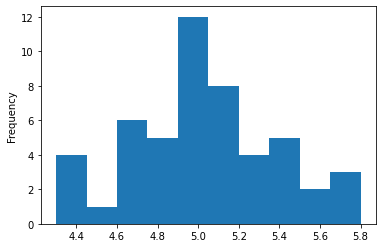

In [28]:
df_setosa.SepalLengthCm.plot.hist()

In [59]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)


In [60]:
import seaborn as sns

Text(0.5, 1.0, 'PetalWidthCm Interval and Counts')

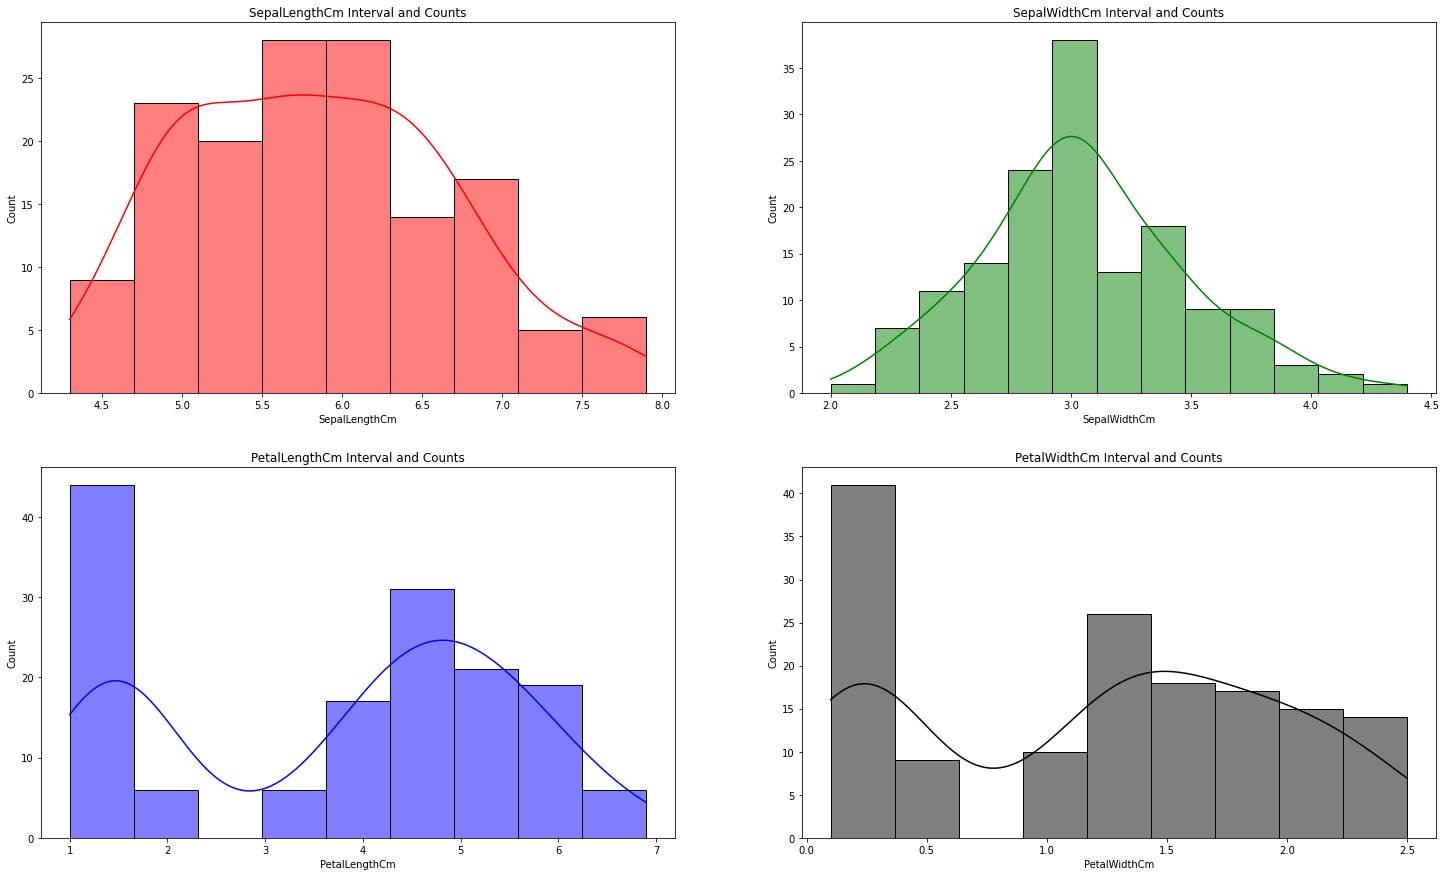

In [61]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(df['SepalLengthCm'], color = 'red', kde = True).set_title('SepalLengthCm Interval and Counts')

plt.subplot(2,2,2)
sns.histplot(df['SepalWidthCm'], color = 'green', kde = True).set_title('SepalWidthCm Interval and Counts')

plt.subplot(2,2,3)
sns.histplot(df['PetalLengthCm'], kde = True, color = 'blue').set_title('PetalLengthCm Interval and Counts')

plt.subplot(2,2,4)
sns.histplot(df['PetalWidthCm'], kde = True, color = 'black').set_title('PetalWidthCm Interval and Counts')

### Sepal Lengths

<AxesSubplot:ylabel='Frequency'>

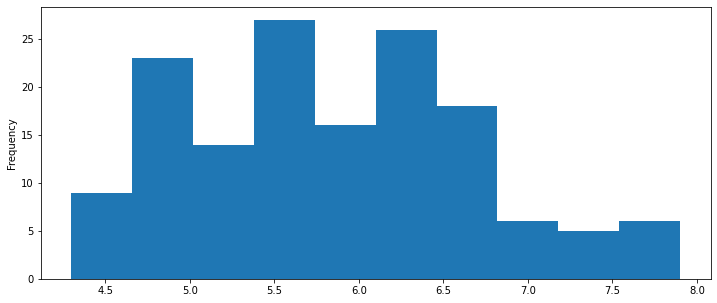

In [57]:
# All sepal lenghs listed for each species
df.SepalLengthCm.plot.hist(figsize=(12,5))

Text(0.5, 1.0, 'Virginica Sepal Lengths')

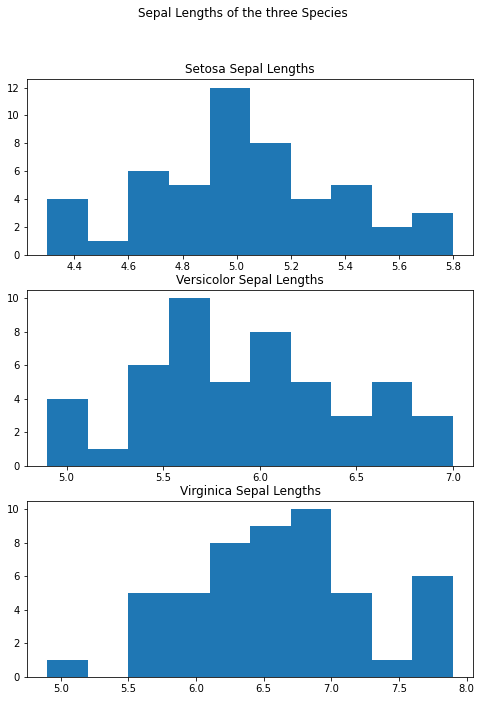

In [48]:
# Create multiple subplots for Sepal Lengths
fig, ax = plt.subplots(3, figsize=(8,10))
fig.suptitle('Sepal Lengths of the three Species')
plt.subplots_adjust(bottom=0.05)

ax[0].hist(df_setosa.SepalLengthCm)
ax[0].set_title('Setosa Sepal Lengths')
ax[1].hist(df_versicolor.SepalLengthCm)
ax[1].set_title('Versicolor Sepal Lengths')
ax[2].hist(df_virginica.SepalLengthCm)
ax[2].set_title('Virginica Sepal Lengths')

From the plots above we can see that there seem to be longer sepal lengths for the Virginica species, where as the other two species are more spread out

### Sepal Width

<AxesSubplot:ylabel='Frequency'>

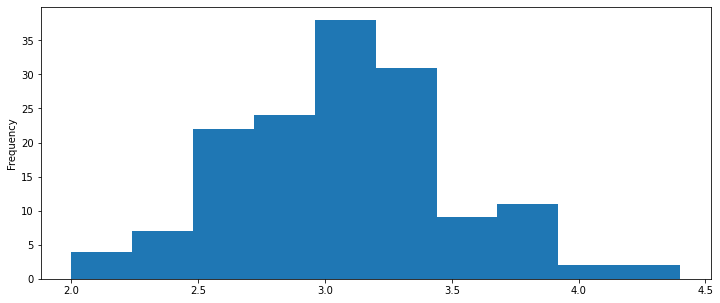

In [56]:
# All sepal widths listed for each species
df.SepalWidthCm.plot.hist(figsize=(12,5))

Text(0.5, 1.0, 'Virginica Sepal Widths')

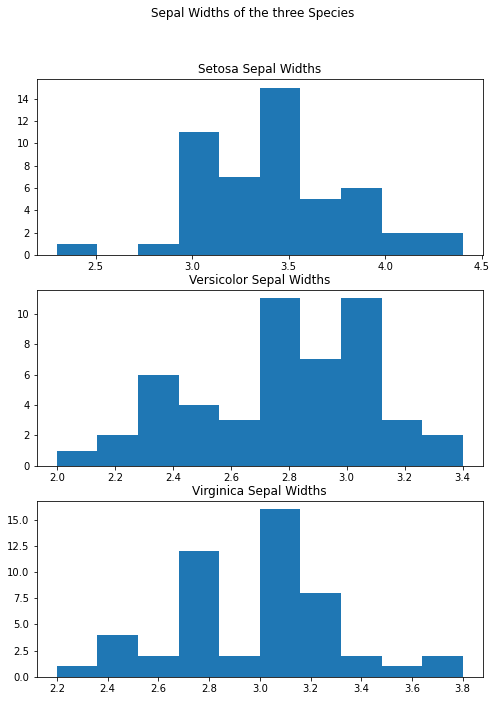

In [47]:
# Create multiple subplots for Sepal Widths
fig, ax = plt.subplots(3, figsize=(8,10))
fig.suptitle('Sepal Widths of the three Species')
plt.subplots_adjust(bottom=0.05)

ax[0].hist(df_setosa.SepalWidthCm)
ax[0].set_title('Setosa Sepal Widths')
ax[1].hist(df_versicolor.SepalWidthCm)
ax[1].set_title('Versicolor Sepal Widths')
ax[2].hist(df_virginica.SepalWidthCm)
ax[2].set_title('Virginica Sepal Widths')

From the above tables the Setosa seems to have the widest sepals

### Petal Lengths

<AxesSubplot:ylabel='Frequency'>

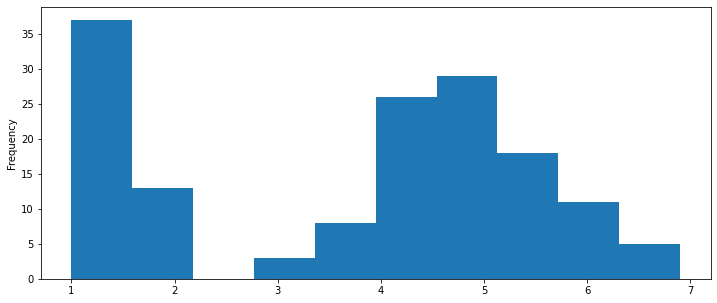

In [55]:
# All petal lengths listed for each species
df.PetalLengthCm.plot.hist(figsize=(12,5))

Text(0.5, 1.0, 'Virginica Petal Lengths')

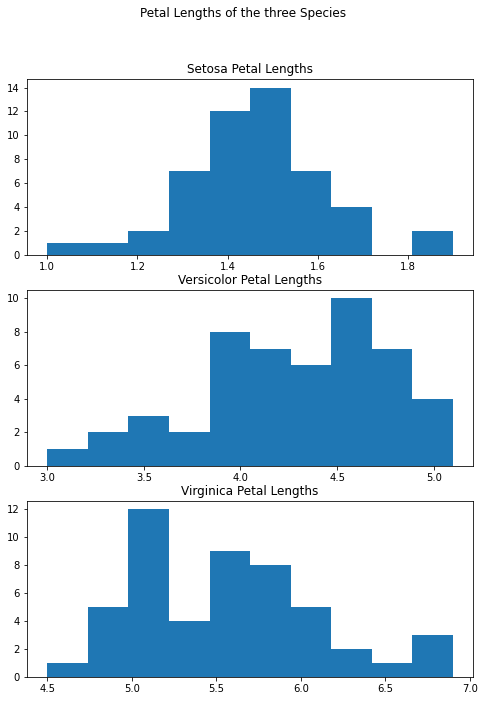

In [49]:
# Create multiple subplots for Petal Lengths
fig, ax = plt.subplots(3, figsize=(8,10))
fig.suptitle('Petal Lengths of the three Species')
plt.subplots_adjust(bottom=0.05)

ax[0].hist(df_setosa.PetalLengthCm)
ax[0].set_title('Setosa Petal Lengths')
ax[1].hist(df_versicolor.PetalLengthCm)
ax[1].set_title('Versicolor Petal Lengths')
ax[2].hist(df_virginica.PetalLengthCm)
ax[2].set_title('Virginica Petal Lengths')

From the tables above we can see that the Setosa petals are much shorter than the other two species, while the Virginica is the longest.

### Petal Widths

<AxesSubplot:ylabel='Frequency'>

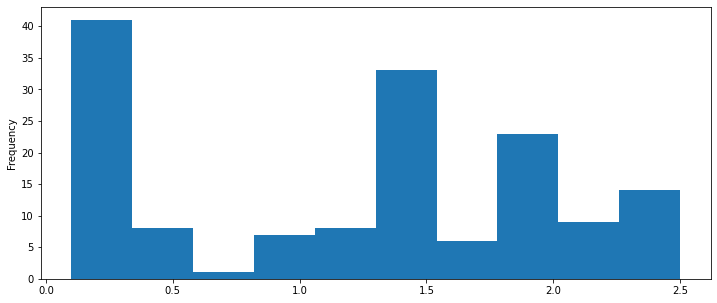

In [54]:
# All petal widths listed for each species
df.PetalWidthCm.plot.hist(figsize=(12,5))

Text(0.5, 1.0, 'Virginica Petal Widths')

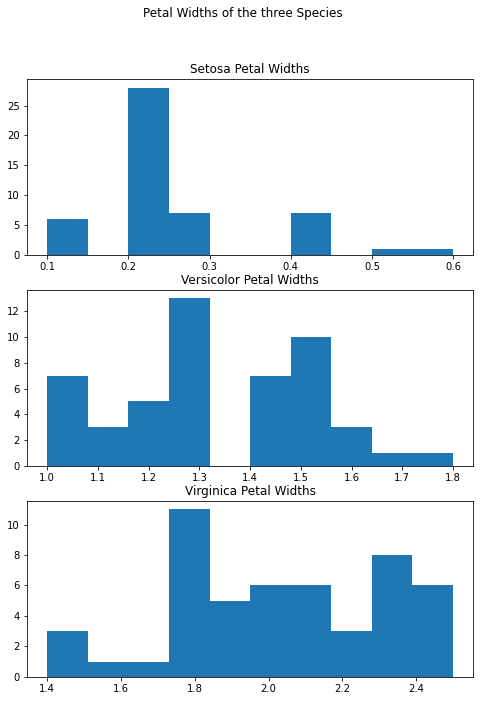

In [50]:
# Create multiple subplots for Petal Widths
fig, ax = plt.subplots(3, figsize=(8,10))
fig.suptitle('Petal Widths of the three Species')
plt.subplots_adjust(bottom=0.05)

ax[0].hist(df_setosa.PetalWidthCm)
ax[0].set_title('Setosa Petal Widths')
ax[1].hist(df_versicolor.PetalWidthCm)
ax[1].set_title('Versicolor Petal Widths')
ax[2].hist(df_virginica.PetalWidthCm)
ax[2].set_title('Virginica Petal Widths')

From these tables the Virginica species has the widest petals, while the Setosa petals have very small petal widths.

Combining the information from all of the graphs it seems that the Virginica species has the longest sepals, and the longest and widest petals. We can infer that the Virginica species is the largest species out of the three.

## Correlations

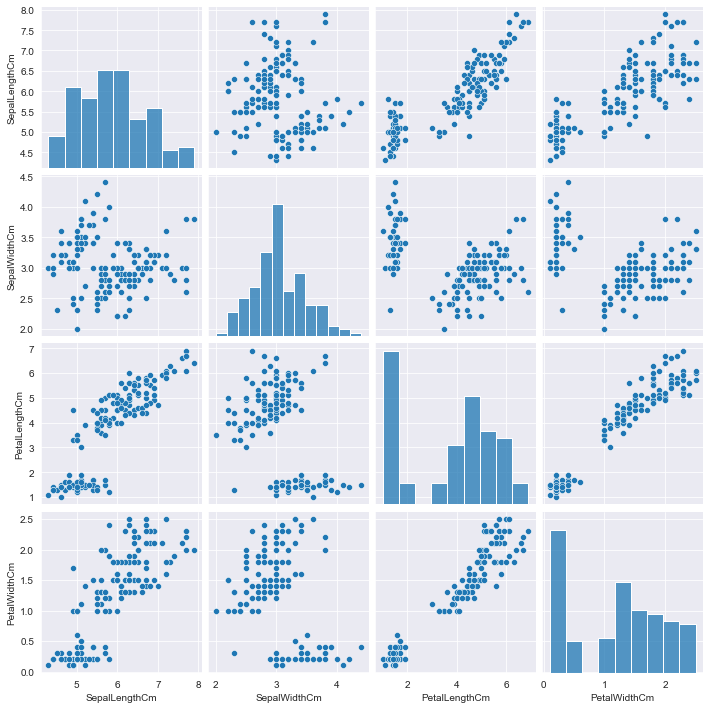

In [64]:
df.drop('Id', axis=1, inplace=True)
features = df.columns
sns.set_style('darkgrid')
sns.pairplot(df[features])

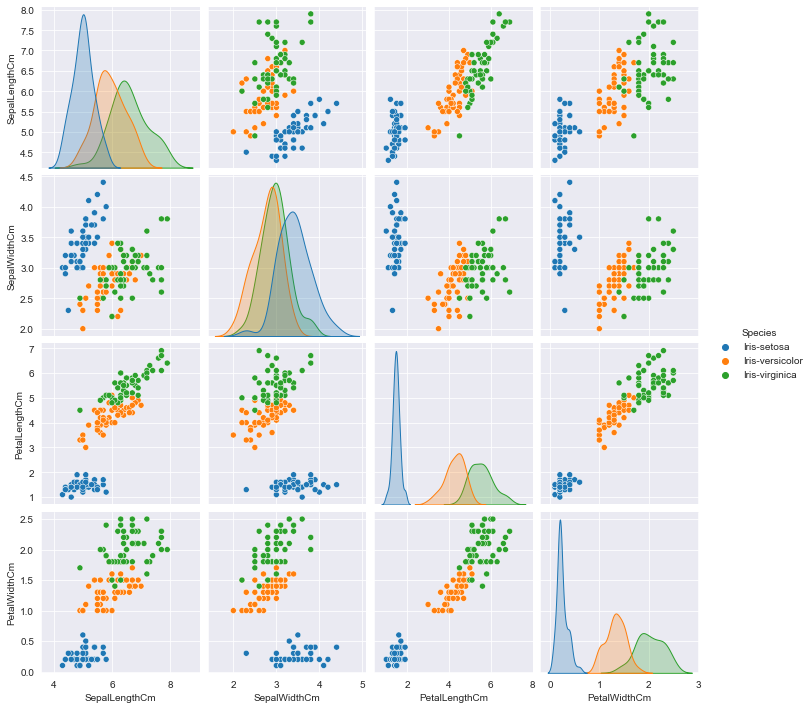

In [65]:
sns.pairplot(df, hue='Species')

<AxesSubplot:>

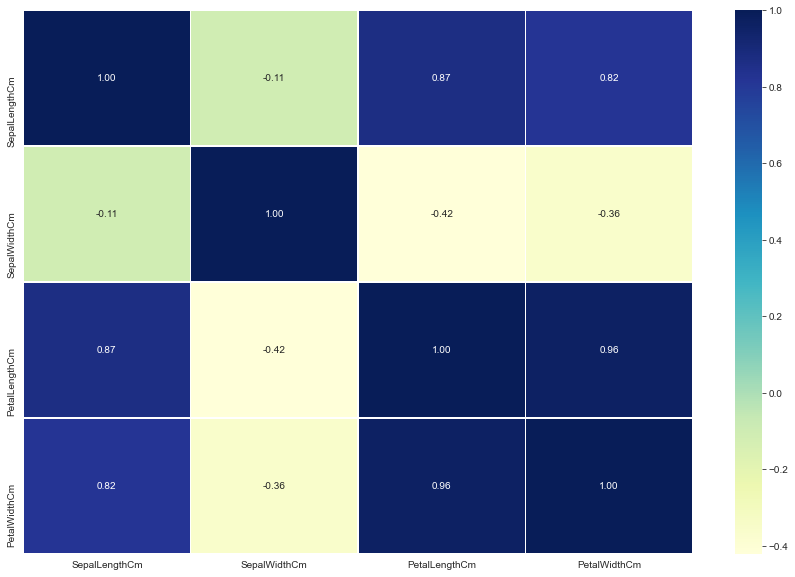

In [66]:
# Creating a correlation table
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu')

## Pandas Profiling

In [68]:
!pip install pandas_profiling

  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=8a17c43f724cef656a2058ca7b4e96b0a6a06a1f403b8009143ce345279ce1d2
  Stored in directory: c:\users\dschy\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107415 sha256=22572d12caae266b1b428a13eac5f7117fe1602dda359b714aca32f62099ddf7
  Stored in directory: c:\users\dschy\appdata\local\pip\cache\wheels\33\27\89\ad03afe7566e638322663c4ae4e1e2c9fd15864578e8883e1c
Successfully built htmlmin phik
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6


In [69]:
from pandas_profiling import ProfileReport

In [71]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Modeling

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# Drop the Species variable from X
X = df.drop('Species', axis=1)

# Make y equal to only the Species values
y = df.Species.values

In [76]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### Splitting the data into train and test sets

In [78]:
# Creating a random seed for reproducability
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [79]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [80]:
y_train, len(y_train)

(array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
        'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
        'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris

In [81]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [82]:
y_test, len(y_test)

(array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object),
 30)

### Model Choices

For this model we will be comparing three different model choices to use:

    1. Logistic Regression - LogisticRegression()
    2. K-Nearest Neighbors - KNeighboursClassifier()
    3. RandomForest - RandomForestClassifier()

In [87]:
# Put the models in a dictionary
models = {'KNN':KNeighborsClassifier(),
         'Logistic Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducable results
    np.random.seed(42)
    # List for model scors
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [88]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'KNN': 1.0, 'Logistic Regression': 1.0, 'Random Forest': 1.0}

## Model Comparison

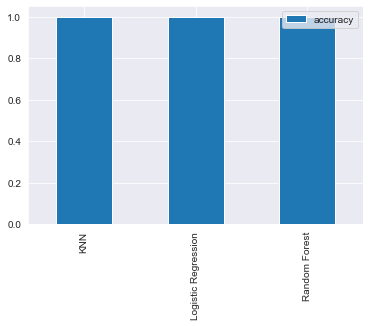

In [90]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Tuning KNN by hand

In [91]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [92]:
train_scores

[1.0,
 0.9666666666666667,
 0.95,
 0.9583333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.975,
 0.9583333333333334,
 0.9666666666666667,
 0.9833333333333333,
 0.9583333333333334,
 0.975,
 0.9666666666666667,
 0.975,
 0.975,
 0.975,
 0.9666666666666667,
 0.9666666666666667,
 0.9583333333333334,
 0.9666666666666667]

Let's plot these scores...

Maximum KNN score on the test data: 100.00%


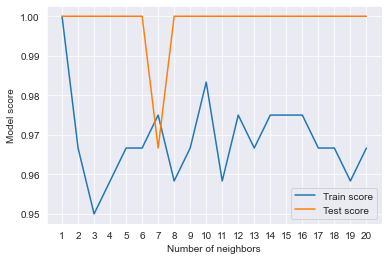

In [93]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tuning models with with RandomizedSearchCV

We will tune the LogisticRegression and RandomForestClassifer models using RandomizedSearchCV

In [115]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Different RandomForestClassifier hyperparameters
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'max_samples': np.arange(1, 20, 2)}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

In [96]:
# Set up a random seed for reproducability
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [97]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [98]:
rs_log_reg.score(X_test, y_test)

1.0

Now let's use RandomizedSearchCV to try and tune our RandomForestClassifier model.

In [116]:
# Set up a random seed for reproducability
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [117]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'max_samples': 17,
 'max_depth': 5}

In [118]:
rs_rf.score(X_test, y_test)

1.0

## Tuning a model with GridSearchCV

In [119]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [120]:
gs_log_reg.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [121]:
gs_log_reg.score(X_test, y_test)

1.0

## Evaluating a classification model, beyond accuracy

In [122]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [123]:
y_preds

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [124]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### Confusion Matrix

In [126]:
# Display the confusion matrix
print(confusion_matrix(y_test, y_preds))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


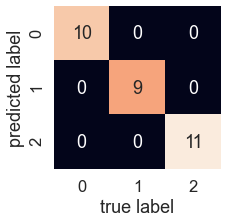

In [127]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
plot_conf_mat(y_test, y_preds)

### Classification Report

In [128]:
# Show classification report
print(classification_report(y_test, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Classification report definitions:

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Best Feature Selection

In [132]:
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [133]:
rs_rf.coef_

AttributeError: 'RandomizedSearchCV' object has no attribute 'coef_'

In [134]:
from sklearn.feature_selection import SelectFromModel

models = {'KNN':KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

KNN


ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [135]:
from sklearn.decomposition import PCA
selectedX = X[:,]

pcaX = PCA(n_components=2)
pcaX = pcaX.fit(selectedX)
pcaX = pcaX.transform(X)
print(pcaX.shape)

plt.scatter(pcaX[:,0], pcaX[:,1])
plt.show()

TypeError: '(slice(None, None, None),)' is an invalid key